# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Оглавление 

1. [Изучение общей информации ](#step_1)

2. [Предобработка данных](#step_2)

3. [Расчет и добавление в таблицу дополнительных показателей](#step_3)

4. [Исследовательский анализ данных](#step_4)

5. [Общий вывод](#step_5)


 ## <a id="step_1"> 1. Изучение общей информации. </a>

#### Выведем общую информацию

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv ('/datasets/real_estate_data.csv', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

#### Описание данных

<b>airports_nearest</b> — расстояние до ближайшего аэропорта в метрах (м)<br>
<b>balcony</b> — число балконов<br>
<b>ceiling_height</b> — высота потолков (м)<br>
<b>cityCenters_nearest</b> — расстояние до центра города (м)<br>
<b>days_exposition</b> — сколько дней было размещено объявление (от публикации до снятия)<br>
<b>first_day_exposition</b> — дата публикации<br>
<b>floor</b> — этаж<br>
<b>floors_total</b> — всего этажей в доме<br>
<b>is_apartment</b> — апартаменты (булев тип)<br>
<b>kitchen_area</b> — площадь кухни в квадратных метрах (м²)<br>
<b>last_price</b> — цена на момент снятия с публикации<br>
<b>living_area</b> — жилая площадь в квадратных метрах(м²)<br>
<b>locality_name</b> — название населённого пункта<br>
<b>open_plan</b> — свободная планировка (булев тип)<br>
<b>parks_around3000</b> — число парков в радиусе 3 км<br>
<b>parks_nearest</b> — расстояние до ближайшего парка (м)<br>
<b>ponds_around3000</b> — число водоёмов в радиусе 3 км<br>
<b>ponds_nearest</b> — расстояние до ближайшего водоёма (м)<br>
<b>rooms</b> — число комнат<br>
<b>studio</b> — квартира-студия (булев тип)<br>
<b>total_area</b> — площадь квартиры в квадратных метрах (м²)<br>
<b>total_images</b> — число фотографий квартиры в объявлении<br>

#### Выведем сновные статистические данные

In [349]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Обращаем внимание на аномалии в  максимальных и минимальных значениях: есть нулекомнатные квартиры, квартиры со 100 метровыми потолками, с общей площадью 12 квадратных метров и т.п.

#### Выведем первые строки таблицы

In [350]:
df.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Пропуски в основном присутствуют в данных полученных автоматически на основе картографических данных и скорее всего означают отсутствие поарка или водоема поблизости.
Дата публикации записана в виде строки потребуется перевод.
Также можно перевести в целочисленный формат столбцы с расстояниями в метрах, значения цены и время экспозиции. В некоторых столбцах присутствуют как пропуски так и нулевые значения.
По столбцам которые заполнялись пользователями (площади, высота потолков, цена, количество комнат и этаж) есть выбросы с абсурдными (вероятно ошибочными) значениями высоты потолков 100 м и 1 м.

## <a id="step_1"> Шаг 2. Предобработка данных </a>

### last_price — цена на момент снятия с публикации

In [351]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Избавимся от лишних нулей после запятой.

In [352]:
# Переведем тип данных в целочисленный.
df['last_price'] = df['last_price'].astype(int)

Посмотрим на распределение значений.

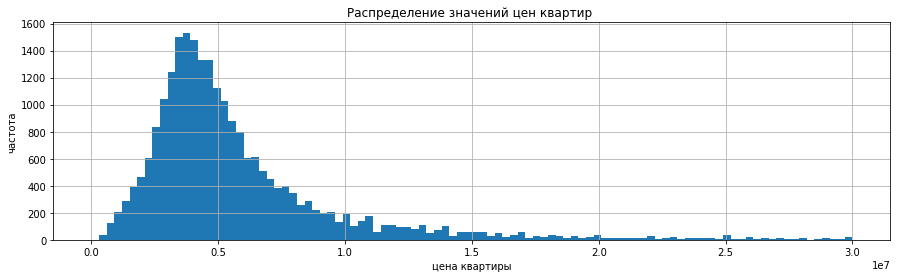

In [353]:
df.hist("last_price", bins=100, range=(0, 30000000), figsize=(15, 4))
plt.xlabel("цена квартиры")
plt.ylabel("частота")
plt.title("Распределение значений цен квартир ")
plt.show()

Пропуски отсутствуют, нулевые значения тоже. Распределение - нормальное, с длинным хвостом больших значений.



### total_area — площадь квартиры в квадратных метрах (м²)

In [354]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

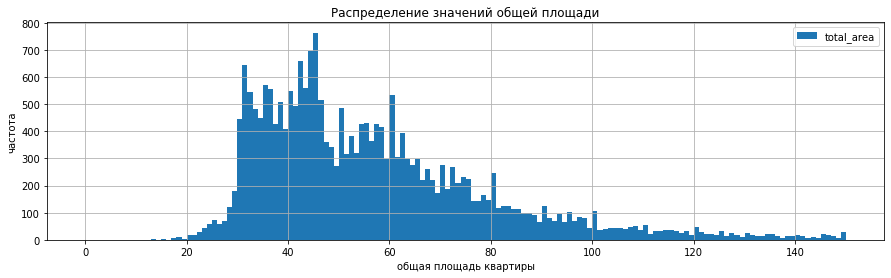

In [355]:
df.plot(y="total_area", kind='hist', bins=150, figsize=(15, 4), range=(0, 150), grid=True)
plt.xlabel("общая площадь квартиры")
plt.ylabel("частота")
plt.title("Распределение значений общей площади")
plt.show()

Присутствуют странные квартиры менее 20 м<sup>2</sup>. На гистограмме хорошо видно, что нормальные площади квартир резко начинаются от 30 м<sup>2</sup>.

Очень большие квартиры более 150 м<sup>2</sup> мало распространены. 

In [356]:
len(df.query("total_area > 150")) / len(df)

0.02379847250938858

Доля квартир более 150 м<sup>2</sup> составляет 2% от общего количества.

###  first_day_exposition — дата публикации


In [357]:
df['first_day_exposition'].dtypes


dtype('O')

Тип 'object' следует перевести в 'datetime'

In [358]:
#переводим Тип 'object' в 'datetime'
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# проверяем
print(df['first_day_exposition'].dtypes)
df.head(3)

datetime64[ns]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.7,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0


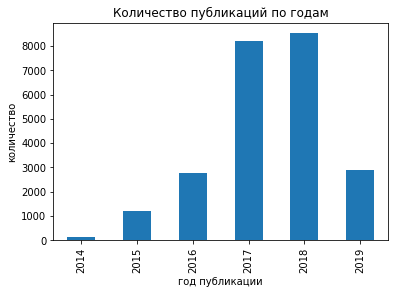

In [359]:
df['first_day_exposition'].groupby(df["first_day_exposition"].dt.year).count().plot(kind="bar")

plt.xlabel("год публикации")
plt.ylabel("количество")
plt.title("Количество публикаций по годам")
plt.show()


Большая часть объявлений за 2017 2018 годы. Малое количество объявлений за предыдущие года объясняется тем что сервис Яндекс.Недвижимость только начал работу в Санкт-Петербурге в декабре 2014, и в 2015 - 2016 еще развивался.


### rooms — число комнат

Посчитаем сколько каких квартир по количеству комнат было представлено в объявлениях, заодно найдем очевидные ошибки в данных.

In [360]:
rooms_stat = df.pivot_table(index='rooms', values='total_area', aggfunc='count')
print(rooms_stat)

       total_area
rooms            
0             197
1            8047
2            7940
3            5814
4            1180
5             326
6             105
7              59
8              12
9               8
10              3
11              2
12              1
14              2
15              1
16              1
19              1


В 197 объявлениях было указано ноль комнат. Возможно это квартиры со свободной планировкой или возможно в квартирах-студиях жилое пространство не считается за комнату, проверим:

In [361]:
# посчитаем квартиры со свободной планировкой и студии у которых указано ноль комнат, и сразу сложим
print('нулекомнатных со свободной планировкой', len(df.query("rooms == 0 and open_plan == True"))) 
print('нулекомнатных студий', len(df.query("rooms == 0 and studio == True")))

нулекомнатных со свободной планировкой 59
нулекомнатных студий 138


59+138=197 Так оно и есть. Интересно у всех ли студий и квартир со свободной планировкой указано ноль комнат.

In [362]:
print('всего с открытой планировкой', len(df.query("open_plan == True")))
print('всего квартир-студий', len(df.query("studio == True")))

всего с открытой планировкой 67
всего квартир-студий 149


Нет не у всех. Для порядка, можно им всем заменить количество комнат на ноль. Но скорее всего, это никак не будет влиять на результат исследования.

### ceiling_height — высота потолков (м)

Посчитаем долю объявлений  в которых не была указана высота потолков.

In [363]:
df['ceiling_height'].isna().mean()

0.38799105447487237

39 % пропущено. Возможно, пропущены значения там, где они очевидны для покупателей. Большинство квартир в типовом жилье 2,5 - 2,55 м. Может быть продавцы не указывали высоту потолков, так как всем и так очевидна эта характеристика например по фотографиям. Проверим эту гипотезу чуть ниже, сперва разберемся со значениями которые есть, оценим их разброс.

In [364]:
df['ceiling_height'].value_counts().tail(10)

2.49      1
4.06      1
1.20      1
4.15      1
3.39      1
27.50     1
5.00      1
3.59      1
4.80      1
100.00    1
Name: ceiling_height, dtype: int64

183 варианта высоты. Видно что некоторые значения излишне точные, а в некоторых неправильные единицы измерения. Допустим что везде где высота больше 25 м, ошибка в единицах измерения - уменьшим их на один порядок. И округлим все значения до одного знака после запятой, точностью здесь можно пожертвовать.

In [365]:
df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] = df['ceiling_height'] / 10

#df.loc[df['ceiling_height'] > 10]['ceiling_height'] = df['ceiling_height'] / 10
df['ceiling_height'].round(1).value_counts()

2.5     3799
2.6     3735
2.8     2248
2.7     1767
3.0     1241
3.2      409
3.1      285
2.9      213
3.3      182
3.5      157
3.4      138
3.6       73
4.0       48
2.4       39
3.7       38
3.8       37
3.9       19
4.2       14
2.0       12
4.5        7
2.3        6
4.4        6
4.1        5
8.0        3
4.7        2
5.3        2
2.2        2
1.8        1
5.2        1
5.5        1
4.6        1
6.0        1
1.0        1
4.3        1
4.8        1
4.9        1
8.3        1
10.3       1
5.6        1
5.8        1
10.0       1
14.0       1
5.0        1
1.2        1
Name: ceiling_height, dtype: int64

Остались ненормальные значения высоты потолка в 8, 10 и 14 м. Возможно это вид художественных мастерских переведенных в жилой фонд. Пока оставим их без изменения и удалять не будем. 

Для удобства категоризируем этот показатель.

До 2,5 включительно будем считать низкими
от 2,5 до 2,85 включительно - средними
от 2,75 высокими.


In [366]:
def ceiling_height_cat(height):
    if height <= 2.55:
        return 'низкие'
    if height <= 2.85:
        return 'средние'
    if height > 2.85:
        return 'высокие'
    return 'не указано, но вероятно низкие'

In [367]:
df['ceiling_height_cat'] = df['ceiling_height'].apply(ceiling_height_cat)
df['ceiling_height_cat'].value_counts()

не указано, но вероятно низкие    9195
средние                           6770
низкие                            4841
высокие                           2893
Name: ceiling_height_cat, dtype: int64

Посмотрим, где находятся квартиры с неуказанной высотой потолка.

In [368]:
#df[df['ceiling_height'].isna()].pivot_table(index='locality_name', values='ceiling_height', aggfunc='count')
no_ceiling_height = df[df['ceiling_height'].isna()].groupby('locality_name')['locality_name'].count()
no_ceiling_height.sort_values(ascending=False).head(20)

locality_name
Санкт-Петербург            5617
посёлок Мурино              322
посёлок Шушары              223
посёлок Парголово           190
деревня Кудрово             177
Гатчина                     158
Выборг                      139
Колпино                     135
Пушкин                      135
Всеволожск                  126
Кудрово                     100
Кингисепп                    76
Красное Село                 66
Сланцы                       63
Петергоф                     56
Сестрорецк                   54
Волхов                       53
посёлок Бугры                47
деревня Новое Девяткино      47
Ломоносов                    42
Name: locality_name, dtype: int64

Как далеко от центра расположены и в домах какой этажноости они находятся

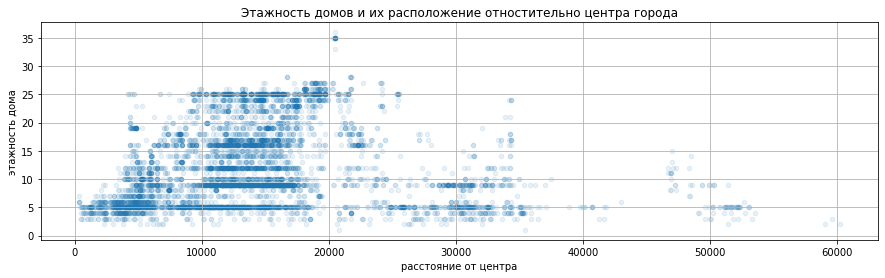

In [369]:
df.query('ceiling_height == "nan"').plot(x='cityCenters_nearest', y='floors_total', kind='scatter', figsize=(15, 4), grid=True, alpha=0.1)
plt.xlabel("расстояние от центра")
plt.ylabel("этажность дома")
plt.title("Этажность домов и их расположение отностительно центра города")

plt.show()

Предположение о том что высота потолков в этих квартирах очевидно-небольшая не подтверждается. Эти квартиры находятся как в новых домах на окраине, так и в старых и в новых домах в центре.

Проведем условную границу центра города, на значении равном 7,5км. Все что ближе пометим 'центр' то что дальше 'не_центр'.
Ниже приводится график объясняющий выбор значения 7,5 км. Высокие потолки (отличительная характеристика домов старого фонда расположенных в центре города) остаются по левую сторону от значения 7,5 км.

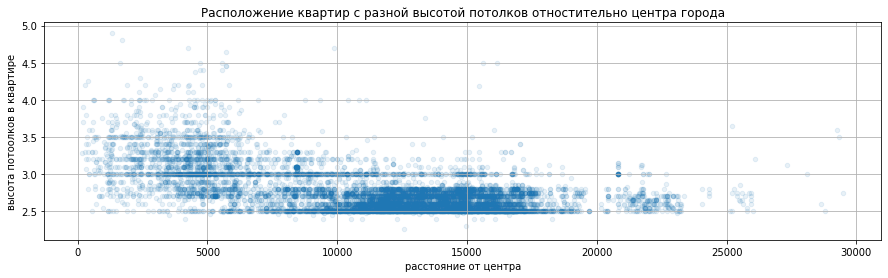

In [370]:
df.query('locality_name == "Санкт-Петербург" and 2 < ceiling_height < 5').plot(x='cityCenters_nearest', y='ceiling_height', kind='scatter', figsize=(15, 4), grid=True, alpha=0.1)
plt.xlabel("расстояние от центра")
plt.ylabel("высота потоолков в квартире")
plt.title("Расположение квартир с разной высотой потолков отностительно центра города")

plt.show()

In [371]:
def center_or_not(distance):
    if distance <= 7500:
        return 'центр'
    if distance > 7500:
        return 'не_центр'
    return 'не_центр'

df['center'] = df['cityCenters_nearest'].apply(center_or_not)
#df.head(10)

Тогда возможно, что все квартиры находящиеся дальше 8 км от центра в домах этажностью более 8 имеют высоту потолков 2,5 - 2,7 м

Заполняем пропуски характерными значениями высоты потолка для дома такой же этажности находящегося в центре или не в центре.

In [372]:
# заполняем пропуски характерными значениями высоты потолка для дома такой же этажности находящегося в центре или не в центре.
df['ceiling_height'] = df.groupby(['center', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
# df.head(10)

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Проверяем остались ли пустые значения

In [373]:
# считаем пустые значения
df['ceiling_height'].isna().sum()

91

In [374]:
# смотрим на некоторые пустые значения
df[df['ceiling_height'].isna()].head(3)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_cat,center
186,12,11640000,65.2,2018-10-02,2,NaN,NaN,30.80,4,NaN,...,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0,"не указано, но вероятно низкие",не_центр
237,4,2438033,28.1,2016-11-23,1,NaN,NaN,20.75,1,NaN,...,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0,"не указано, но вероятно низкие",не_центр
457,4,9788348,70.8,2015-08-01,2,NaN,NaN,38.40,12,NaN,...,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0,"не указано, но вероятно низкие",не_центр


Для записей где не указано количество этажей в доме, заполним значения просто характерными величинами для центра и не_центра соответственно.

In [375]:
df['ceiling_height'] = df.groupby('center')['ceiling_height'].apply(lambda x: x.fillna(x.median()))

In [376]:
# опять считаем пустые значения
df['ceiling_height'].isna().sum()

0

Пропусков значений нет. 

### floor — этаж

Считаем долю пропущенных значений и подсчитываем повторяющиеся.

In [377]:
df['floor'].isna().mean()

0.0

In [378]:
df['floor'].value_counts()

2     3368
3     3073
1     2917
4     2804
5     2621
6     1305
7     1218
8     1083
9     1051
10     687
12     526
11     523
13     379
15     343
14     337
16     315
17     227
18     178
19     147
21     125
22     113
20     110
23     100
24      63
25      46
26      24
27      10
28       1
33       1
29       1
30       1
32       1
31       1
Name: floor, dtype: int64

Пропусков нет, явных проблем со значениями не наблюдается.

### floors_total — всего этажей в доме

In [379]:
df['floors_total'].value_counts()

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64

In [380]:
df[df['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_cat,center
186,12,11640000,65.2,2018-10-02,2,2.600,NaN,30.80,4,NaN,...,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0,"не указано, но вероятно низкие",не_центр
237,4,2438033,28.1,2016-11-23,1,2.600,NaN,20.75,1,NaN,...,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0,"не указано, но вероятно низкие",не_центр
457,4,9788348,70.8,2015-08-01,2,2.600,NaN,38.40,12,NaN,...,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0,"не указано, но вероятно низкие",не_центр
671,4,6051191,93.6,2017-04-06,3,2.600,NaN,47.10,8,NaN,...,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0,"не указано, но вероятно низкие",не_центр
1757,5,3600000,39.0,2017-04-22,1,2.600,NaN,NaN,9,NaN,...,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0,"не указано, но вероятно низкие",не_центр
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000,63.5,2017-05-24,2,2.600,NaN,NaN,3,NaN,...,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0,средние,не_центр
22656,4,4574160,64.5,2017-04-02,2,2.600,NaN,31.70,20,NaN,...,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0,"не указано, но вероятно низкие",не_центр
22808,0,14569263,110.4,2016-11-20,3,3.055,NaN,45.38,6,NaN,...,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0,"не указано, но вероятно низкие",центр
23590,0,21187872,123.3,2017-04-25,3,3.055,NaN,50.40,18,NaN,...,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0,"не указано, но вероятно низкие",центр


86 с пропусками.

С этими пропусками ничего предпринимать не будем, на результаты исследования они не повлияют.

### cityCenters_nearest — расстояние до центра города (м)

Количество пропусков в этом столбце:

In [381]:
# считаем количество пропусков 
df['cityCenters_nearest'].isna().sum()

5519

Пропуск здесь может быть по разным причинам:  либо квартира расположена очень далеко от центра, либо в населенном пункте нет центра, либо она находится в самом центре.

Посмотрим находятся ли эти объявления  за пределами Санкт-Петербурга.

In [382]:
df.query('locality_name != "Санкт-Петербург"')['cityCenters_nearest'].isna().sum()

5458

Почти все они за пределами Санкт-Петербурга. Значит при выявлении зависимости между ценой о расстоянием от центра, записи без значений пока не будем учитывать вместе с другими населенными пунктами.

In [383]:
df_nospb_nocenter = df.query('locality_name == "Санкт-Петербург" and cityCenters_nearest == "nan"')
# df_nospb_nocenter['ceiling_height'].hist(bins=6)
df_nospb_nocenter['ceiling_height_cat'].value_counts()

не указано, но вероятно низкие    30
высокие                           19
средние                           10
низкие                             2
Name: ceiling_height_cat, dtype: int64

Если судить по значениям высоты потолков в этой группе, можно предположить, что все эти квартиры находятся в центре.

Можно заменить на среднее значение для Санкт-Петербурга.

### locality_name — название населённого пункта

Считаем количество пропусков

In [384]:
df['locality_name'].isna().sum()

49

In [385]:
# df['locality_name'].pivot_table(index='столбец_1', values='столбец_2', aggfunc='median')

Интересно посмотреть, где находятся эти квартиры относительно центра.

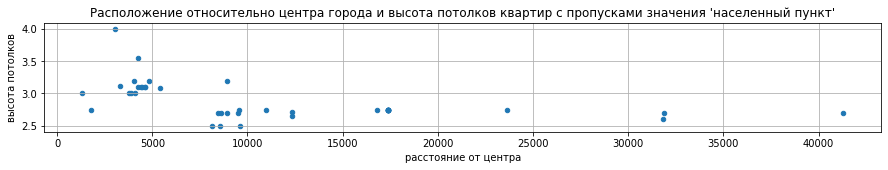

In [386]:
df[df['locality_name'].isna()].plot(x='cityCenters_nearest', y='ceiling_height', kind='scatter', figsize=(15, 2), grid=True)
plt.xlabel("расстояние от центра")
plt.ylabel("высота потолков")
plt.title("Расположение относительно центра города и высота потолков квартир с пропусками значения 'населенный пункт'")
plt.show()

Сравним с двумя диаграммами зависимости васоты потолка и отдаления от центра, верхняя Санкт-Петербург, снизу другие населенные пункты.

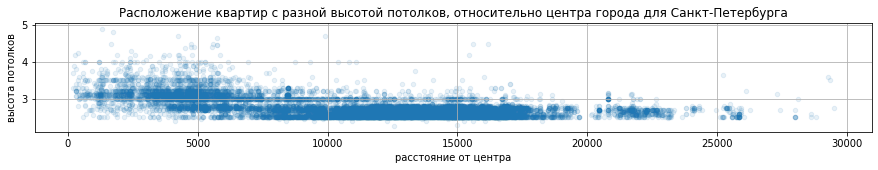

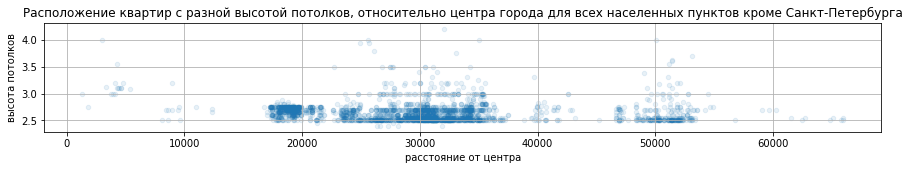

In [387]:
df.query('locality_name == "Санкт-Петербург" and 2 < ceiling_height < 5').plot(x='cityCenters_nearest', y='ceiling_height', kind='scatter', figsize=(15, 2), grid=True, alpha=0.1)
plt.xlabel("расстояние от центра")
plt.ylabel("высота потолков")
plt.title("Расположение квартир с разной высотой потолков, относительно центра города для Санкт-Петербурга")
plt.show()

df.query('locality_name != "Санкт-Петербург" and 2 < ceiling_height < 5').plot(x='cityCenters_nearest', y='ceiling_height', kind='scatter', figsize=(15, 2), grid=True, alpha=0.1)
plt.xlabel("расстояние от центра")
plt.ylabel("высота потолков")
plt.title("Расположение квартир с разной высотой потолков, относительно центра города для всех населенных пунктов кроме Санкт-Петербурга")
plt.show()

Почти все объявления в которых пропущено значение Населенный Пункт - находятся ближе 20км от центра и имеют высоту потолков среднюю и выше, что характерно для квартир расположенных в ценральной части Санкт-Петербурга.

In [388]:
# заполняем значениями СПБ
df['locality_name'] = df['locality_name'].fillna('Санкт-Петербург')
# проверяем 
df['locality_name'].isna().sum()

0

Пропуски заполнены.

### balcony — число балконов

In [389]:
df['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Если бы нулевые значения отсутствовали, можно было бы утверждать, что пропуск здесь соответствует нулю. Так как нули присутствуют и их значительное количество, заполнять пропуски не будем. Данных, что бы сделать вывод о влиянии на цену достаточно

Пропуски в значениях определяющих близость к парку или пруду оставим как есть, в исследовании будем опираться на то что есть.

Пропуски в остальных столбцах на результаты исследования не повлияют.

### Проверка на наличие дубликатов

Проверим данные на наличие дубликатов

In [390]:
# посчитаем сколько всего простых дубликатов 
df.duplicated().sum()

0

Дубликаты отсутствуют

## <a id="step_3"> 3. Посчитайте и добавьте в таблицу </a>

#### Расчет стоимости квадратного метра для каждого предложения

In [391]:
# добавляем столбец стоимости квадратного метра в целочисленном формате
df['square_meter_price'] = (df['last_price'] / df['total_area']).astype(int)

#### Добавление столбцов  "день недели", "месяц", "год" публикации объявления

In [392]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

#### Добавление столбца с характеристикой этажа

In [393]:
# функция принимает этаж и количество этажей в доме
# возвращает категорию первый, последний или другой
def set_floor_level(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'  


# применим функцию к датафрейму
df['floor_level'] = df.apply(set_floor_level, axis=1)
        

#### Столбец с расстояния в км

In [394]:
# столбец с расстояниея в км
df['km_to_center'] = (df['cityCenters_nearest'].dropna() / 1000).round(0)
# print(df.head())

#### Отношение жилой площади к общей

In [395]:
df['living_area_factor'] = df['living_area'] / df['total_area']

#### Отношение площади кухни к общей площади

In [396]:
df['kitchen_area_factor'] = df['kitchen_area'] / df['total_area']

In [397]:
# проверяем
df.sample(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ceiling_height_cat,center,square_meter_price,weekday,month,year,floor_level,km_to_center,living_area_factor,kitchen_area_factor
18512,10,5290000,51.4,2018-11-02,2,2.70,16.0,28.7,4,NaN,...,средние,не_центр,102918,4,11,2018,другой,12.0,0.558366,0.198444
4322,12,7000000,90.7,2017-04-10,3,2.70,17.0,49.3,13,NaN,...,средние,не_центр,77177,0,4,2017,другой,16.0,0.543550,0.135612
19398,9,4780000,43.0,2018-02-17,1,2.55,10.0,21.0,7,NaN,...,низкие,не_центр,111162,5,2,2018,другой,15.0,0.488372,0.232558
23146,15,2200000,31.1,2018-08-29,1,2.50,9.0,18.0,5,False,...,низкие,не_центр,70739,2,8,2018,другой,NaN,0.578778,0.209003
18185,6,2300000,25.0,2018-09-11,0,2.70,17.0,15.0,2,NaN,...,"не указано, но вероятно низкие",не_центр,92000,1,9,2018,другой,NaN,0.600000,NaN


Для каждого предложения рассчитаны и добавлены дополнительные значения:
- стоимость квадратного метра
- год публикации
- месяц публикации
- день недели когда была совершена публикация
- характеристика этажа (первый, последний, другой)
- расстояние до центра города в км.
- отношение жилой площади к общей
- отношение площади кухни к общей площади

Все готово для исследовательского анализа.

## <a id="step_4"> 4.Исследовательский анализ данных. </a>

### Метод

Все факторы влияющие на стоимость квартиры можно подразделить на три основных:
- Расположение
- Площадь (Количество) 
- Качество 

О расположении объекта в нашем исследовании, сообщают два показателя удаленность от центра Санкт-Петербурга и наименование населенного пункта.
Общая площадь квартиры - основной количественный показатель, напрямую сваязанный с конечной стоимостью. Кооличество комнат в каком то смысле отражение общей площади, эти параметры следуют один из другого.


Под качеством будем понимать совокупность всех дополнительных характеристик:

- площадь кухни
- высота потолка
- наличие балкона
- расположение рядом с парком
- расположение у воодоема
- дальноость от аэропорту (такое соседство скорее минус чем плюс) 

Чего нет в наших данных, но что безусловно сильно влияет на стоимость  - так это информации о доме в котором находится квартира, какого года постройки, в каком состоянии квартира, требуется ли ремонт. Покупатель определяет это по фотографиям.
Мы же сталкиваясь с аномалией врезультатах, что бы как то объяснить часто будем обращаться к паре косвенных признаков высоте потолков и расположению относительно центра.






### Исследуем параметры площадь, цена, число комнат, высота потолков

Построим гистограммы этих показателей

In [398]:
# выделим столбцы в отдельный датафрейм
df_select = df[['total_area', 'last_price', 'rooms', 'ceiling_height']]


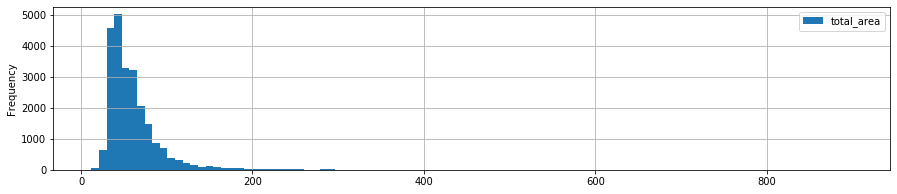

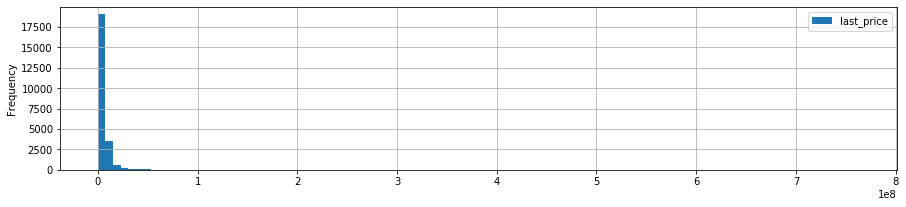

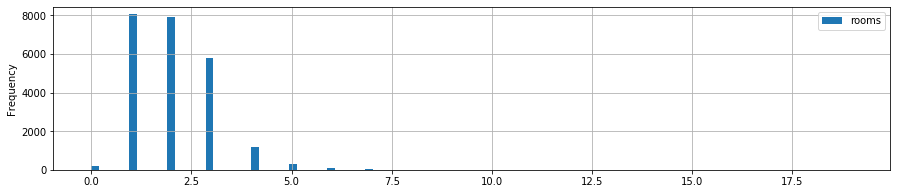

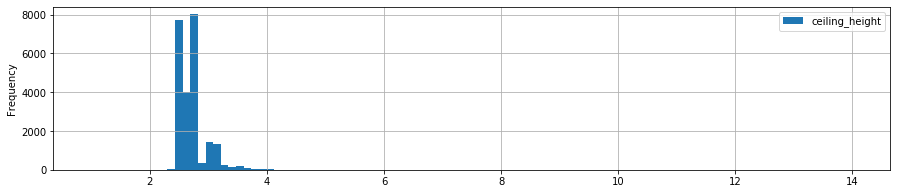

In [399]:

for columns in df_select:
    df_select[columns].plot(kind='hist', bins=100, grid=True, legend=True, figsize=(15, 3))
    plt.show()

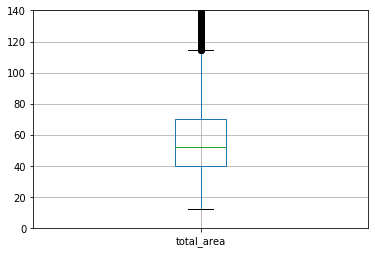

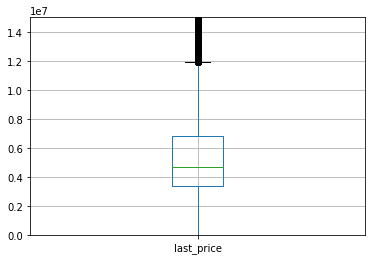

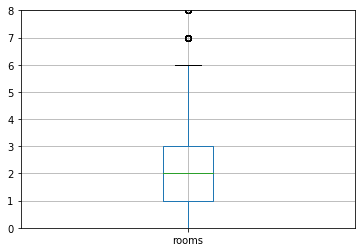

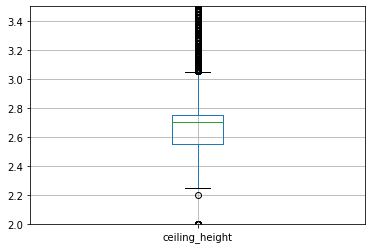

In [400]:
df.boxplot(column=['total_area'])
plt.ylim(0, 140)
plt.show()
df.boxplot(column=['last_price'])
plt.ylim(0, 15000000)
plt.show()
df.boxplot(column=['rooms'])
plt.ylim(0, 8)
plt.show()
df.boxplot(column=['ceiling_height'])
plt.ylim(2, 3.5)
plt.show()

Все гистограммы имеют длинные хвосты сверх больших значений. Доля таких аномальных квартир очень мала, вынесем их за границы гистограмм.

In [401]:
# ограничим значения которые войдут в графики
df_select = df[['total_area', 'last_price', 'rooms', 'ceiling_height']].query("total_area < 150 and last_price < 15000000 and 2 < ceiling_height < 4 and rooms < 8")

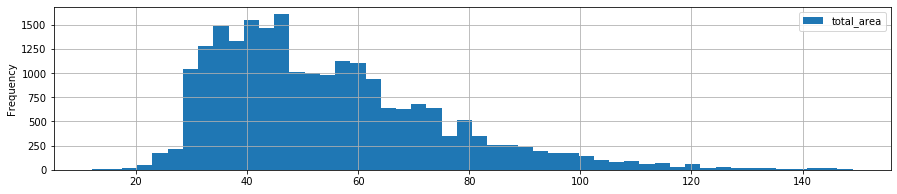

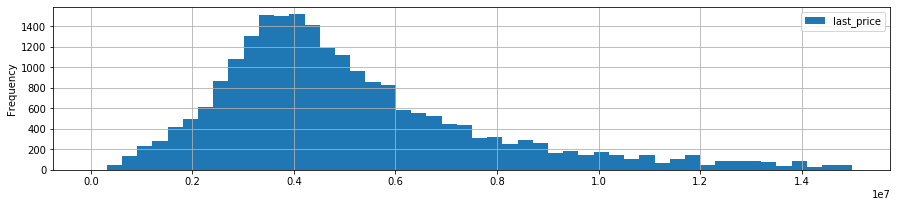

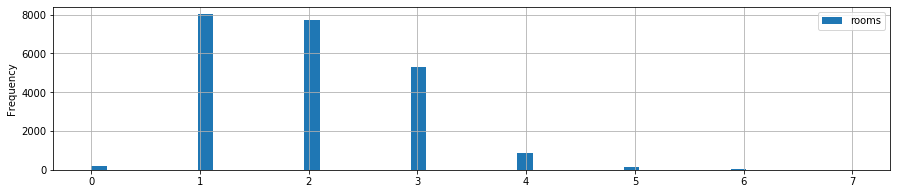

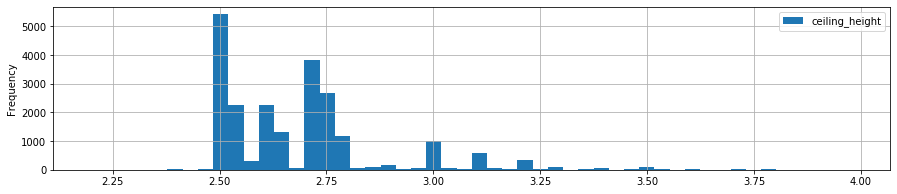

In [402]:
for columns in df_select:
    df_select[columns].plot(kind='hist', bins=50, grid=True, legend=True, figsize=(15, 3))
    plt.show()

Оценивать распределение значений можно только у показателя цены и то отдавая себе отчет в том что квартира предмет дорогоостоящий и значение цены должно начинаться с разумных значений. 

Резкие скачки на гистограмме общих площадей, вызваны скорее всего зависимостью площади от количества комнат, и минимальных размеров квартир вообще.

38 % данных о высоте потолков были пропущены и мы их заменили значениями характерными для соответствующей этажности дома и его расположения. Проверим, не ошиблись ли мы, не являются ли квартиры с пропущенными значениями высоты потолка, группой с особенными признаками.
Наложим гистограммы значений с пропусками на гистограммы без пропусков.

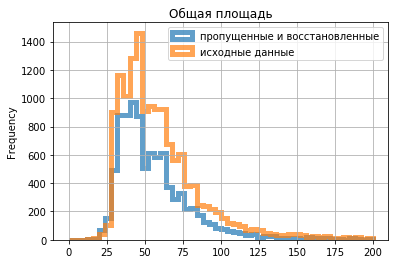

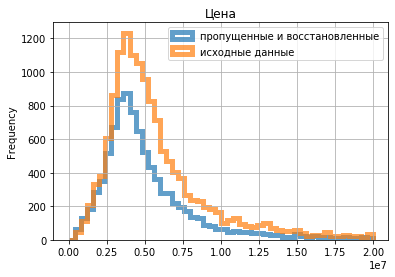

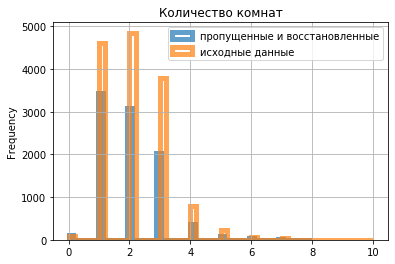

In [403]:
# общая площадь
ax = df.query('ceiling_height_cat == "не указано, но вероятно низкие"').plot(kind='hist', y='total_area', histtype='step', range=(0, 200), bins=50, linewidth=5, alpha=0.7, label='пропущенные и восстановленные')
df.query('ceiling_height_cat != "не указано, но вероятно низкие"').plot(kind='hist', y='total_area', histtype='step', range=(0, 200), bins=50, linewidth=5, alpha=0.7, label='исходные данные', ax=ax, grid=True, legend=True, title="Общая площадь")
plt.show()

# цена
ax = df.query('ceiling_height_cat == "не указано, но вероятно низкие"').plot(kind='hist', y='last_price', histtype='step', range=(0, 20000000), bins=50, linewidth=5, alpha=0.7, label='пропущенные и восстановленные')
df.query('ceiling_height_cat != "не указано, но вероятно низкие"').plot(kind='hist', y='last_price', histtype='step', range=(0, 20000000), bins=50, linewidth=5, alpha=0.7, label='исходные данные', ax=ax, grid=True, legend=True, title="Цена")
plt.show()

# количество комнат
ax = df.query('ceiling_height_cat == "не указано, но вероятно низкие"').plot(kind='hist', y='rooms', histtype='step', range=(0, 8), bins=50, linewidth=5, alpha=0.7, label='пропущенные и восстановленные')
df.query('ceiling_height_cat != "не указано, но вероятно низкие"').plot(kind='hist', y='rooms', histtype='step', range=(0, 10), bins=50, linewidth=5, alpha=0.7, label='исходные данные', ax=ax, grid=True, legend=True, title="Количество комнат")
plt.show()

Общий характер графиков совпадает. Небольшое отличие только в количестве 1 комнатных и 2 комнатных квартир.

### Время продажи квартиры

Посмотрим общую статистику


In [404]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

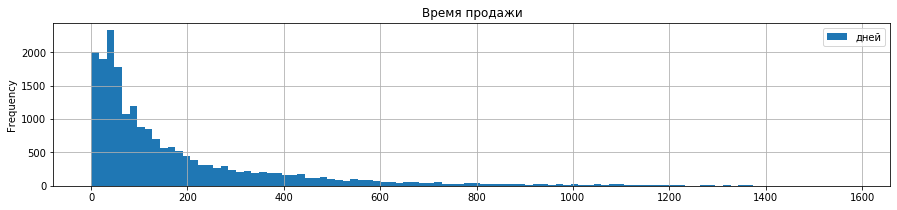

In [405]:
df.plot(kind='hist', y='days_exposition', bins=100, label='дней', grid=True, legend=True, title="Время продажи", figsize=(15, 3))
plt.show()

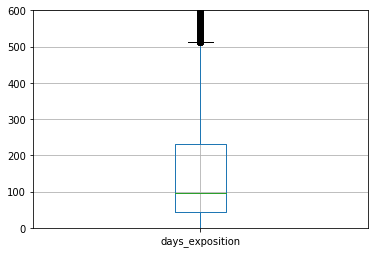

In [406]:
df.boxplot(column=['days_exposition'])
plt.ylim(0, 600)
plt.show()

Нормальным можно считать срок продажи 100 дней. Быстрой продажей срок до 45 дней. Медленной от 230 дней и больше. 

Интересные пики значений можно обнаружить если увеличить масштаб гистограммы в пределах от нуля до 100 дней. Особенно много объявлений снимается с публикации в какие-то особенные дни.

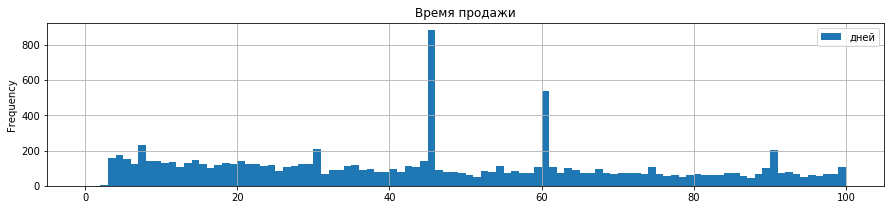

In [407]:
df.plot(kind='hist', y='days_exposition', bins=100, label='дней', range=(0, 100), grid=True, legend=True, title="Время продажи", figsize=(15, 3))
plt.show()

In [408]:
df['days_exposition'].value_counts().sort_values(ascending=False).head(6)

45.0    880
60.0    538
7.0     234
30.0    208
90.0    204
4.0     176
Name: days_exposition, dtype: int64

На 30-й, 45-й, 60-й и 90-й дни, объявления снимаются чаще, чем на другие дни. Скорее всего это происходит из за какого то техническоого ограничения на публикации. Нужно смотреть правила и условия актуальные на период активности этих объявлений.

Посмотрим, зависит ли время продажи от количества фотографийв объявлении.

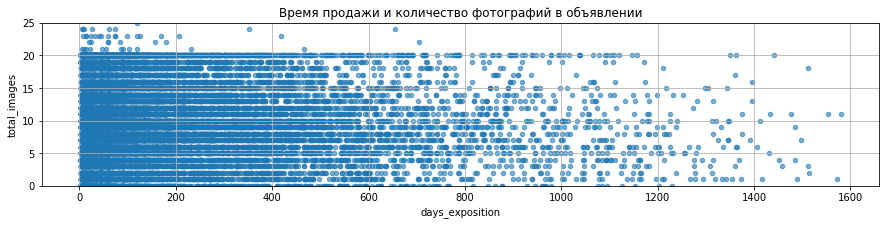

In [409]:
#plt.scatter(df['days_exposition'], df['total_images'], alpha=0.1)
df.plot(y='total_images', x='days_exposition', kind='scatter', figsize=(15, 3), ylim=(0, 25), grid=True, alpha=0.6, title="Время продажи и количество фотографий в объявлении")
plt.show()

От количества фотографий скорость продажи не зависит. 

Квартира не импульсная покупка, судя по минимальному времени продажи покупатели принимают решение минимум 4 дня. Хотя то, что в первые четыре дня нет прямо ни одной покупки говорит скорее что это тоже технический момент, связанный например с модерацией объявлений.

### Редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

#### Стоимость квадратного метра

В первую очередь найдем и исключим сверхдорогие объекты.

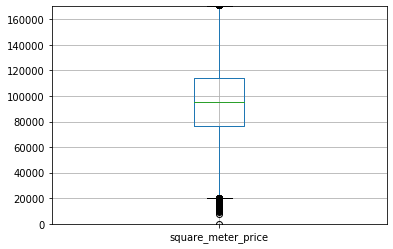

In [410]:

df.boxplot(column=['square_meter_price'])
plt.ylim(0, 170000)
plt.show()

In [411]:
print(len(df.query('square_meter_price > 170000')))
df.query('square_meter_price > 170000 and ceiling_height_cat == "низкие"')

940


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ceiling_height_cat,center,square_meter_price,weekday,month,year,floor_level,km_to_center,living_area_factor,kitchen_area_factor
6421,7,30000000,118.0,2019-03-22,3,2.50,11.0,60.00,4,NaN,...,низкие,центр,254237,4,3,2019,другой,5.0,0.508475,0.338983
6475,20,8200000,33.0,2018-08-11,1,2.50,25.0,18.50,21,NaN,...,низкие,не_центр,248484,5,8,2018,другой,12.0,0.560606,0.393939
6489,10,6000000,34.1,2018-02-07,1,2.50,5.0,20.00,3,NaN,...,низкие,центр,175953,2,2,2018,другой,6.0,0.586510,0.351906
7355,0,6900000,25.0,2019-04-16,1,2.52,5.0,NaN,5,False,...,низкие,не_центр,276000,1,4,2019,последний,10.0,NaN,NaN
8882,20,25000000,113.0,2017-09-26,4,2.50,15.0,68.00,7,NaN,...,низкие,центр,221238,1,9,2017,другой,4.0,0.601770,0.123894
10576,4,35000000,155.0,2018-11-18,4,2.50,5.0,80.00,3,NaN,...,низкие,центр,225806,6,11,2018,другой,1.0,0.516129,0.193548
10898,8,7550000,42.8,2018-12-28,1,2.50,25.0,21.40,2,NaN,...,низкие,не_центр,176401,4,12,2018,другой,12.0,0.500000,0.280374
11004,12,10400000,47.0,2018-05-23,2,2.50,5.0,24.00,3,NaN,...,низкие,центр,221276,2,5,2018,другой,2.0,0.510638,0.170213
13773,10,15500000,80.0,2018-08-27,2,2.50,12.0,44.00,6,NaN,...,низкие,центр,193750,0,8,2018,другой,6.0,0.550000,0.158750
13838,17,12500000,60.0,2017-12-01,1,2.50,5.0,20.00,3,NaN,...,низкие,центр,208333,4,12,2017,другой,4.0,0.333333,0.416667


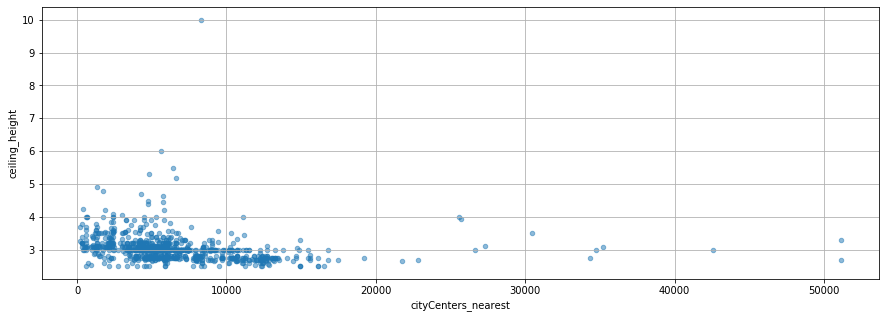

In [412]:
df.query('square_meter_price > 170000').plot(x='cityCenters_nearest', y='ceiling_height', kind='scatter', figsize=(15, 5), grid=True, alpha=0.5)
plt.show()

Квартиры с сверх высокой стоимостью квадратного метра расположены в центральной части Санкт-Петербурга. Обязательным атрибутом престижного жилья являются потолки выше среднего.

Теперь взглянем на сверх дешевые. Где они находятся.

In [413]:
df.query('square_meter_price < 20000').pivot_table(index='locality_name', values='square_meter_price', aggfunc='count').sort_values('square_meter_price', ascending=False).head(10)


,square_meter_price
locality_name,
Сланцы,74
Бокситогорск,14
Пикалёво,12
поселок городского типа Никольский,5
Санкт-Петербург,5
деревня Старополье,3
Гатчина,3
Луга,3
поселок городского типа Ефимовский,3


Большинство квартир с самой низкой стоимостью квадратного метра находятся в городе Сланцы на востоке Лен.области.

#### Общая площадь

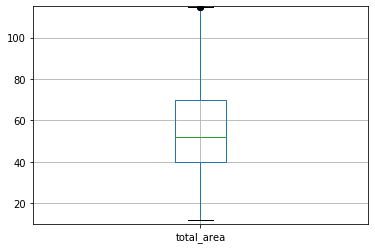

In [414]:
df.boxplot(column=['total_area'])
plt.ylim(10, 115)
plt.show()

Как и в случае с кварами с высокой стоимостью квадратного метра, сверхбольшие квартиры сосредоточены в раонах Санкт-Петербурга близких к центру. Все закономерно.

In [415]:
len(df.query('total_area > 115'))


1217

#### Очень маленькие квартиры

В данных есть квартиры площадью менее 20 <sup>2</sup>. Скорее всего это картиры-студии, но только 7 из них так обозначены в соответствующем столбце.

In [416]:
len(df.query("total_area < 20 and studio == True"))

7

In [417]:
df.query("total_area < 20 and studio == False").sort_values('total_area').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ceiling_height_cat,center,square_meter_price,weekday,month,year,floor_level,km_to_center,living_area_factor,kitchen_area_factor
19904,4,2400000,12.0,2017-07-19,1,2.55,5.0,10.0,2,NaN,...,низкие,центр,200000,2,7,2017,другой,1.0,0.833333,NaN
17961,3,1400000,13.0,2017-12-03,1,2.60,9.0,NaN,1,NaN,...,средние,не_центр,107692,6,12,2017,первый,16.0,NaN,NaN
19807,0,3800000,13.0,2018-07-04,1,3.10,5.0,10.0,3,NaN,...,"не указано, но вероятно низкие",центр,292307,2,7,2018,другой,1.0,0.769231,NaN
19546,3,1850000,13.0,2019-03-11,1,3.40,5.0,NaN,2,False,...,высокие,центр,142307,0,3,2019,другой,5.0,NaN,NaN
19558,2,1686000,13.2,2018-12-17,1,3.10,5.0,NaN,1,NaN,...,"не указано, но вероятно низкие",центр,127727,0,12,2018,первый,4.0,NaN,NaN


12 <sup>2</sup> это неправдоподобно мало для квартиры, но зато почти в самом центре. Считать  данные этих объявлений недостоверными оснований нет. Удалять не будем, учтем однако что в столбце 'studio' встречаются недостоверные значения.

In [418]:
df_cuted = df.query('20000 < square_meter_price < 170000 and total_area < 115')
# len(df.query('20000 < square_meter_price < 170000 and total_area < 115'))

### Какие факторы больше всего влияют на стоимость квартиры? 
Ответ на вопрос зависит ли цена квартиры от площади представляется очевидным. Чем больше. тем дороже:


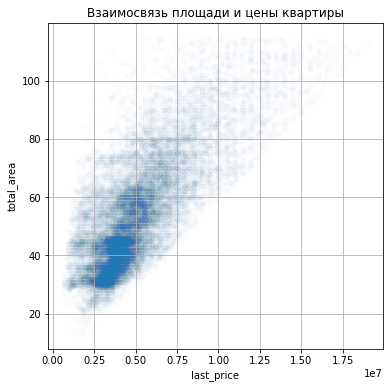

Коэффициент корредяции: 0.7605179827126292


In [419]:
# сравним

df_cuted.plot(x='last_price', y='total_area', kind='scatter', figsize=(6, 6), grid=True, alpha=0.01)
plt.title("Взаимосвязь площади и цены квартиры")
plt.show()
print('Коэффициент корредяции:', df_cuted['last_price'].corr(df_cuted['total_area']))

Сравним цену квадратного метра с другими количественными показателями.

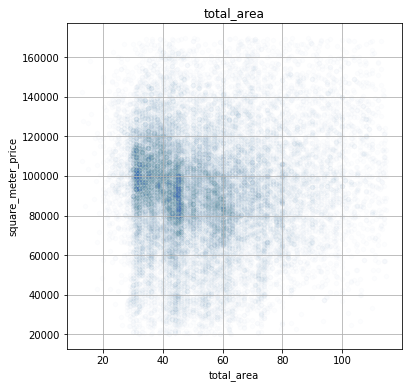

Коэффициент корредяции: 0.039610931891129256


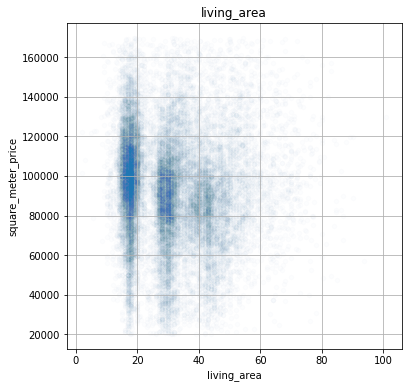

Коэффициент корредяции: -0.06701251496258248


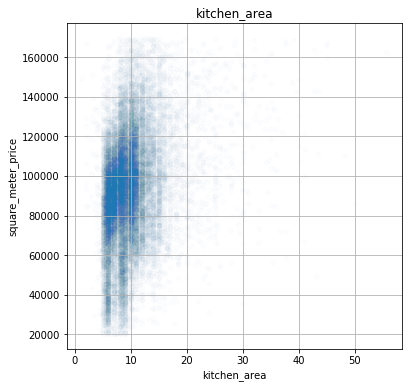

Коэффициент корредяции: 0.2798502461620448


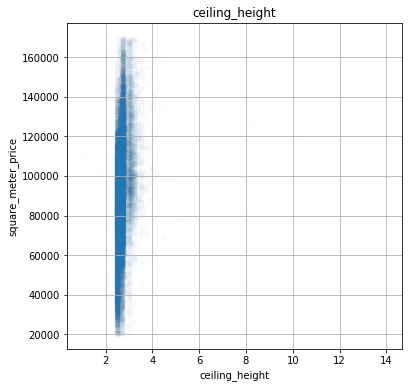

Коэффициент корредяции: 0.26947327498319423


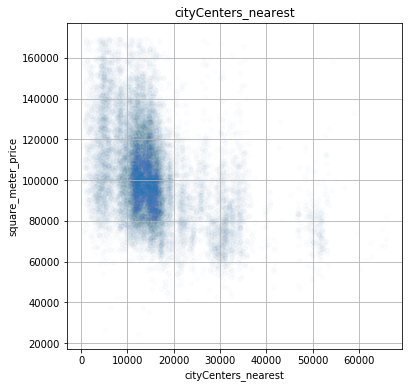

Коэффициент корредяции: -0.4040433786880707


In [420]:
corr_list = ['total_area', 'living_area', 'kitchen_area', 'ceiling_height', 'cityCenters_nearest']
for i in corr_list:
    df_cuted.plot(y='square_meter_price', x=i, kind='scatter', figsize=(6, 6), grid=True, alpha=0.01)
    plt.title(i)
    #plt.ylabel("расстояние")
    plt.show()
    print('Коэффициент корредяции:', df_cuted['square_meter_price'].corr(df_cuted[i]))

Почти полное отсутствие зависимостей. Такой подход ничего не дает. Рассмотрим каждый параметр более внимательно.

### Дата размещения

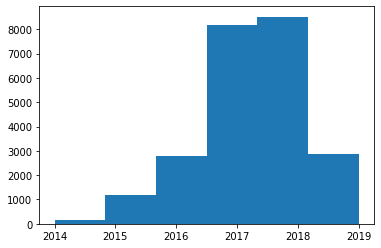

In [421]:
plt.hist(df['year'], bins=6)
#plt.title(i)
plt.show()

Зависит ли цена от года публикации.
Посмотрим как изменяется от года к году средняя цена за квадратный метр и сравним ее с ценой по какому нибудь однородному и широкопредставленному сегменту. Например квартирами отдаленными от центра на 10 - 15 км.

In [422]:
df['square_meter_price'].describe()
df.query('10000 < cityCenters_nearest < 15000')['square_meter_price'].describe()

count      6759.000000
mean     107462.135227
std       23918.276187
min       24439.000000
25%       91601.500000
50%      103680.000000
75%      119085.500000
max      413978.000000
Name: square_meter_price, dtype: float64

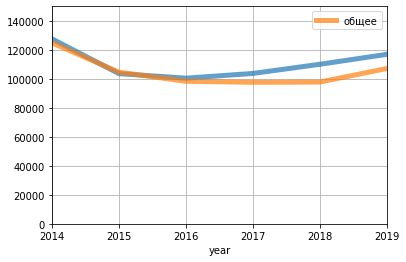

In [423]:
# строим график по сгруппированному по годам срезу "спальные райны" , сравниваем среднюю цену за квадратный метр
ax = df.query('10000 < cityCenters_nearest < 15000').groupby('year')['square_meter_price'].mean().plot(kind='line',linewidth=5, alpha=0.7, label='спальные районы')

df.groupby('year')['square_meter_price'].mean().plot(kind='line', ylim=(0, 150000), linewidth=5, alpha=0.7, label='общее', ax=ax, grid=True, legend=True, title="")
plt.show()


За исследуемый интервал с 2014 по 2019 год цены на квартиры упали примерно на 15% и почти восстановились. Причем цена квадратного метра в спальных районах Санкт-Петербурга восстанавливается активней, чем общая средняя цена.

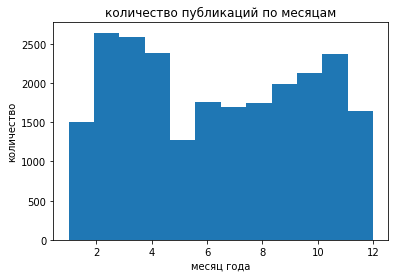

In [424]:
plt.hist(df['month'], bins=12)
plt.title('количество публикаций по месяцам')
plt.xlabel("месяц года")
plt.ylabel("количество")
plt.show()

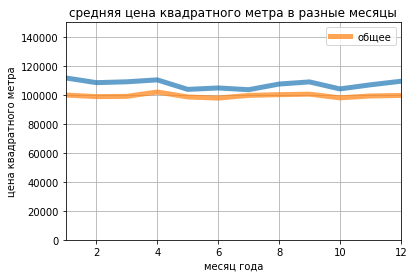

In [425]:
# строим график по сгруппированному по годам срезу "спальные райны" , сравниваем среднюю цену за квадратный метр
ax = df.query('10000 < cityCenters_nearest < 15000').groupby('month')['square_meter_price'].mean().plot(kind='line',linewidth=5, alpha=0.7, label='спальные районы')

df.groupby('month')['square_meter_price'].mean().plot(kind='line', ylim=(0, 150000), linewidth=5, alpha=0.7, label='общее', ax=ax, grid=True, legend=True, title="")
plt.title('средняя цена квадратного метра в разные месяцы')
plt.xlabel("месяц года")
plt.ylabel("цена квадратного метра")
plt.show()


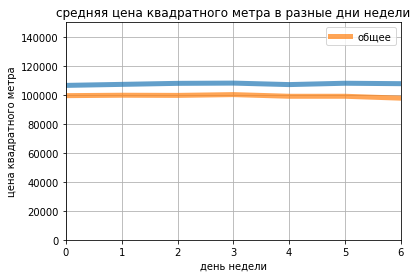

In [426]:
# строим график по сгруппированному по годам срезу "спальные райны" , сравниваем среднюю цену за квадратный метр
ax = df.query('10000 < cityCenters_nearest < 15000').groupby('weekday')['square_meter_price'].mean().plot(kind='line',linewidth=5, alpha=0.7, label='спальные районы')

df.groupby('weekday')['square_meter_price'].mean().plot(kind='line', ylim=(0, 150000), linewidth=5, alpha=0.7, label='общее', ax=ax, grid=True, legend=True, title="")
plt.title('средняя цена квадратного метра в разные дни недели')
plt.xlabel("день недели")
plt.ylabel("цена квадратного метра")
plt.show()

Дата публикации (год, месяц и день недели) не влияет на стоимость квадратного метра.

### Прочие факторы

#### Расстояние до парка, пруда, аэропорта

Построим графики зависимости цены за м<sup>2</sup> от расстояния.

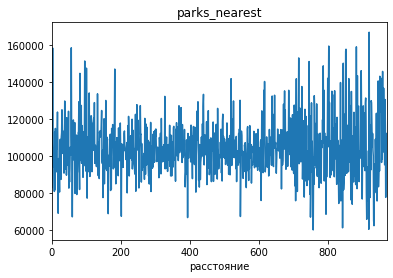

Коэффициент корредяции: 0.07418269115434477



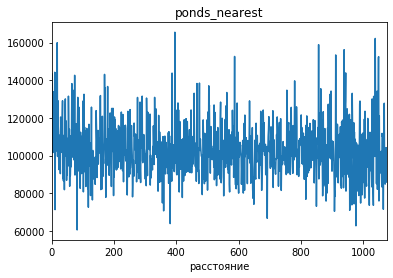

Коэффициент корредяции: -0.08850476150245964



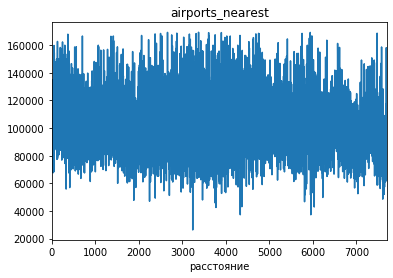

Коэффициент корредяции: -0.07605420334065763



In [427]:
# строим графики зависимостей стоимости квадратного метра и прочих факторов
col_list = ['parks_nearest','ponds_nearest','airports_nearest']
for i in col_list:
    a = df_cuted.groupby(i)['square_meter_price'].mean().reset_index()
    a['square_meter_price'].plot(kind='line', alpha=1)
    plt.title(i)
    plt.xlabel("расстояние")
    plt.show()
    # считаем коэффициент корреляции по каждому соотношению
    print('Коэффициент корредяции:', a[i].corr(a['square_meter_price']))
    print()
    

Коэффициент корреляции близок к нулю. Судя по графикам стоимость жилья не зависит от близости к парку, пруду или аэроопорту.


В исходных данных есть столбцы со значением наличия/отсутствия парка или пруда в радиусе 3000м

In [428]:
parks_around = df_cuted.pivot_table(
    index='parks_around3000', 
    values='square_meter_price', 
    aggfunc=['count','median']
           )
parks_around.columns = ['count', 'median_square_meter_price']

parks_around                                      
                                       
                                                                             

,count,median_square_meter_price
parks_around3000,,
0.0,9537,98632
1.0,4977,102173
2.0,1421,102631
3.0,456,99680


In [429]:
ponds_around = df_cuted.pivot_table(
    index='ponds_around3000', 
    values='square_meter_price', 
    aggfunc=['count','median']
           )
ponds_around.columns = ['count', 'median_square_meter_price']

ponds_around

,count,median_square_meter_price
ponds_around3000,,
0.0,8485,99193
1.0,5198,100000
2.0,1617,101626
3.0,1091,106783


Если судить по ним, то увеличение цены при наличии рядом парка или пруда есть. Очень маленькое.

Что если вернуться к значениям расстояния до ближайшего парка и просто посчитать средние цены за кв.метр при разной удаленности:

In [430]:
print('парк в 50 м -', df_cuted.query('parks_nearest <= 50')['square_meter_price'].median())
print('от 50 до 100 м -', df_cuted.query('50 < parks_nearest <= 100')['square_meter_price'].median())
print('от 100 до 500 м - ', df_cuted.query('100 < parks_nearest <= 500')['square_meter_price'].median())
print('от 500 до 5 км -', df_cuted.query('500 < parks_nearest <= 5000')['square_meter_price'].median())

парк в 50 м - 104532.5
от 50 до 100 м - 100000.0
от 100 до 500 м -  101639.0
от 500 до 5 км - 102702.0


Такой подсчет подтверждает:зависимость если и есть то очень незначительная и отрицательныя. 
Но нужно отметить небольшое (4%) увеличение цены для квартир расположенных непосредственно на краю парков. 

Для прудов это увеличение цены в непосредственной близости видно и на графике, проверим:

In [431]:
print('парк в 50 м -', df_cuted.query('ponds_nearest <= 50')['square_meter_price'].median())
print('от 50 до 100 м -', df_cuted.query('50 < ponds_nearest <= 100')['square_meter_price'].median())
print('от 100 до 500 м -', df_cuted.query('100 < ponds_nearest <= 500')['square_meter_price'].median())
print('от 500 до 1,5 км -', df_cuted.query('500 < ponds_nearest <= 1500')['square_meter_price'].median())
print('от 1,5 км до 5 км -', df_cuted.query('1500 < ponds_nearest <= 5000')['square_meter_price'].median())

парк в 50 м - 107421.5
от 50 до 100 м - 105236.0
от 100 до 500 м - 101604.0
от 500 до 1,5 км - 100000.0
от 1,5 км до 5 км - nan


Да, действительно. Средняя цена за метр в квартире с видом на воду, или в близости от нее выше чем в среднем по городу

#### Балконы

Посмотрим на средние значения стоимости квадратного метра с балконами и без объявлений в которых это было указано.

In [432]:
df_cuted.pivot_table(index='balcony', values='square_meter_price', aggfunc=['count','median'])


,count,median
,square_meter_price,square_meter_price
balcony,,
0.0,3458,89434.0
1.0,3900,92642.5
2.0,3472,96502.5
3.0,69,90591.0
4.0,145,99264.0
5.0,264,94827.0


In [433]:
# считаем медиану стоимости кв. м в городе с балконами и делим на медиану стоимости кв.м в городе без балконов    
df_cuted.query("locality_name == 'Санкт-Петербург' and balcony > 0")['square_meter_price'].median() / df_cuted.query("locality_name == 'Санкт-Петербург' and balcony == 0")['square_meter_price'].median() - 1


0.07654159162336094

В среднем, квартиры с балконами в Санкт-Петербурге стоят на 8% дороже чем без балконов.
В области аналогичная разница составляет 6%

In [434]:
# считаем медиану стоимости кв. м в области с балконами и делим на медиану стоимости кв.м в области без балконов
df_cuted.query("locality_name != 'Санкт-Петербург' and balcony > 0")['square_meter_price'].median() / df_cuted.query("locality_name != 'Санкт-Петербург' and balcony == 0")['square_meter_price'].median() - 1

0.05649437570719651

В среднем квадратный метр в квартире с балконом или с несколькими стоит дороже чем без них. В Санкт-Петербурге эта разница чуть больше, в области меньше.


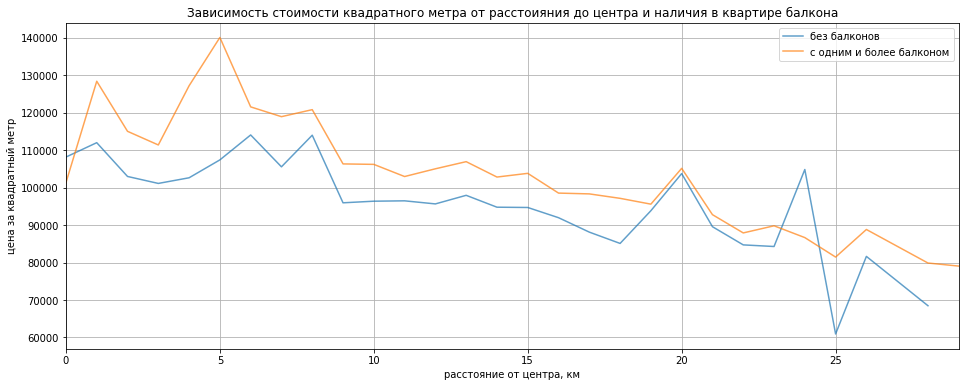

In [435]:

df_cuted[(df_cuted['balcony'] == 0) & (df_cuted['locality_name'] == 'Санкт-Петербург')].groupby('km_to_center')['square_meter_price'].median().plot(kind='line', alpha=0.7, figsize=(16,6), label='без балконов' )
df_cuted[(df_cuted['balcony'] > 0) & (df_cuted['locality_name'] == 'Санкт-Петербург')].groupby('km_to_center')['square_meter_price'].median().plot(kind='line', alpha=0.7, figsize=(16,6), label='c одним и более балконом' )
    
plt.grid(True)
plt.legend()    
plt.title('Зависимость стоимости квадратного метра от расстоияния до центра и наличия в квартире балкона')
plt.xlabel("расстояние от центра, км")
plt.ylabel("цена за квадратный метр")
plt.show()

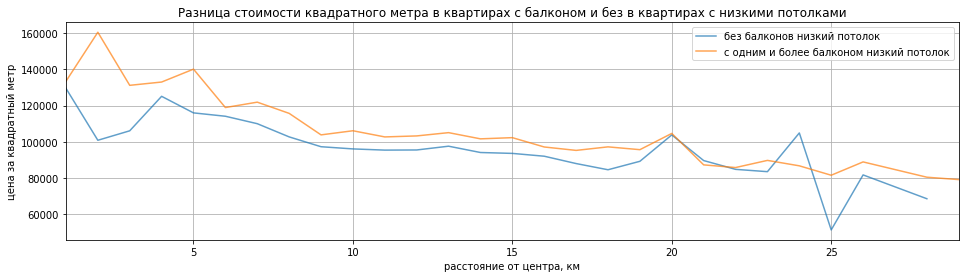

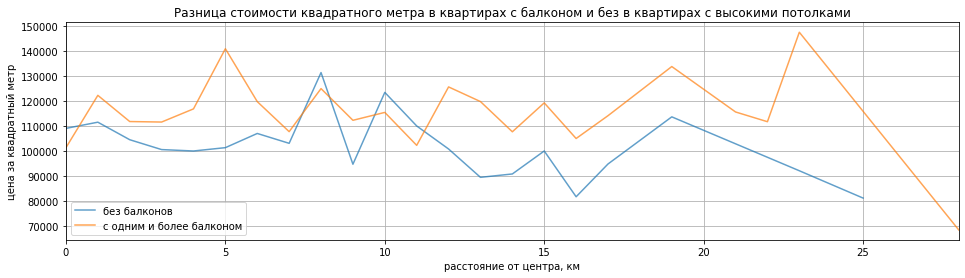

In [436]:

df_cuted[(df_cuted['balcony'] == 0) & 
         (df_cuted['locality_name'] == 'Санкт-Петербург') & 
         (df_cuted['ceiling_height'] < 2.8)
        ].groupby('km_to_center')['square_meter_price'].median().plot(kind='line', alpha=0.7, figsize=(16,4), label='без балконов низкий потолок' )

df_cuted[(df_cuted['balcony'] > 0) & 
         (df_cuted['locality_name'] == 'Санкт-Петербург') & 
         (df_cuted['ceiling_height'] < 2.8)
        ].groupby('km_to_center')['square_meter_price'].median().plot(kind='line', alpha=0.7, figsize=(16,4), label='c одним и более балконом низкий потолок' )
    
plt.grid(True)
plt.legend()    
plt.title('Разница стоимости квадратного метра в квартирах с балконом и без в квартирах с низкими потолками')
plt.xlabel("расстояние от центра, км")
plt.ylabel("цена за квадратный метр")
plt.show()

df_cuted[(df_cuted['balcony'] == 0) & 
         (df_cuted['locality_name'] == 'Санкт-Петербург') & 
         (df_cuted['ceiling_height'] >2.8)].groupby('km_to_center')['square_meter_price'].median().plot(kind='line', alpha=0.7, figsize=(16,4), label='без балконов' )

df_cuted[(df_cuted['balcony'] > 0) & 
         (df_cuted['locality_name'] == 'Санкт-Петербург') & 
         (df_cuted['ceiling_height'] > 2.8)].groupby('km_to_center')['square_meter_price'].median().plot(kind='line', alpha=0.7, figsize=(16,4), label='c одним и более балконом' )

plt.grid(True)
plt.legend()    
plt.title('Разница стоимости квадратного метра в квартирах с балконом и без в квартирах с высокими потолками')
plt.xlabel("расстояние от центра, км")
plt.ylabel("цена за квадратный метр")
plt.show()

In [437]:
balcony_tab = df_cuted.query('ceiling_height_cat != "не указано, но вероятно низкие" and balcony == 0').pivot_table(index='ceiling_height_cat', values='square_meter_price', aggfunc='median')
balcony_tab.columns = ['no_balcony']
balcony_tab = balcony_tab.join(df_cuted.query('ceiling_height_cat != "не указано, но вероятно низкие" and balcony > 0').pivot_table(index='ceiling_height_cat', values='square_meter_price', aggfunc='median'))
balcony_tab.columns = ['no_balcony', 'yes_balcony']
balcony_tab['increase'] = balcony_tab['yes_balcony'] / balcony_tab['no_balcony'] - 1
balcony_tab


,no_balcony,yes_balcony,increase
ceiling_height_cat,,,
высокие,102061,110903.5,0.086639
низкие,81710,86666.0,0.060654
средние,90000,99009.0,0.100100


В целом, наличие балкона увеличивает цену квартиры. Из этого правила есть исключения в сегменте квартир с высокими поотолками.

### Населенные пункты

Задание: Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [438]:
locality_top = df.pivot_table(index='locality_name', values='square_meter_price', aggfunc=['count', 'mean']).reset_index()
locality_top.columns = ['locality_name', 'count', 'square_meter_price']
locality_top_ten = locality_top.sort_values('count', ascending=False).head(10)
locality_top_ten.sort_values('square_meter_price')

,locality_name,count,square_meter_price
4,Выборг,237,58141.489451
3,Всеволожск,398,68654.007538
6,Гатчина,307,68745.693811
13,Колпино,338,75424.150888
326,посёлок Шушары,440,78676.904545
291,посёлок Мурино,522,85751.733716
296,посёлок Парголово,327,90175.489297
93,деревня Кудрово,299,92473.086957
32,Пушкин,369,103125.373984
33,Санкт-Петербург,15770,114784.747242


Населенные пункты Кудрово, Парголово, Шушары и Мурино по факту являются крайними (дальними) районами гоорода Санкт-Петербурга. Балгодаря такому их выделению можно судить насколько тами ниже цены на квартиры на 20 - 30 % от среднегородских.

### Расстояние до центра города

Построим график зависимости цены от удаленности от центра.

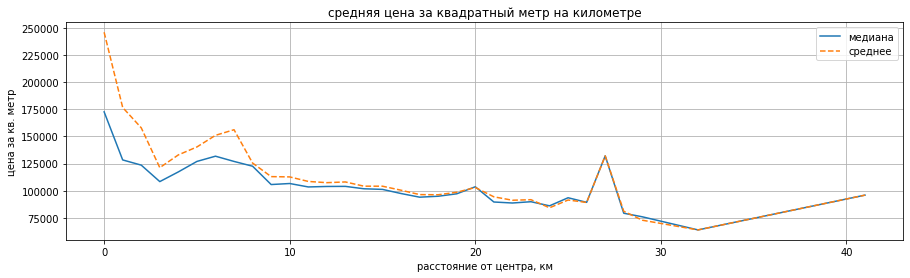

In [439]:
# столбец с расстоянием в км
df['km_to_center'] = (df['cityCenters_nearest'].dropna() / 1000).round(0)
# print(df.head())

km_cost = df.query('locality_name == "Санкт-Петербург"').pivot_table(index='km_to_center', values='square_meter_price', aggfunc=['count', 'mean', 'median']).reset_index()
km_cost.columns = ['km_to_center', 'count', 'mean', 'median']
# km_cost.head()

# график 
plt.figure(figsize=(15,4))
plt.plot(km_cost['km_to_center'], km_cost['median'], label='медиана')
plt.plot(km_cost['km_to_center'], km_cost['mean'], label='среднее', linestyle='dashed'  )

plt.xlabel("расстояние от центра, км")
plt.ylabel("цена за кв. метр")
plt.title("средняя цена за квадратный метр на километре")

plt.grid(True)
plt.legend()
plt.show()

По мере приближения к центру средняя цена за квадратный метр растет.
Но есть интересный феномен:
примерно на расстоянии 9 км от центра цена растет активнее, но к 3 км падает на тот же уровень. Пик на расстоянии 7,5 км - это районы сталинской застройки. Квартиры здесь ценятся почти как в центре. Падение цены в радиусе 4 км. это районы так называемого "серого пояса", промышленных предприятий конца 19 - начала 20 века. Ввиду этого неблагоприятного соседства, вокруг них цены на квартиры снижаются.

Расстояние 3 км, где мы видим возобновление роста можно считать границей центра.

### Влияние этажа на стоимость

In [440]:

floor_first = df_cuted.query('floor_level == "первый" and locality_name == "Санкт-Петербург"').pivot_table(index='km_to_center', values='square_meter_price', aggfunc='median')
floor_first.columns = ['first']

floor_last = df_cuted.query('floor_level == "последний" and locality_name == "Санкт-Петербург"').pivot_table(index='km_to_center', values='square_meter_price', aggfunc='median')
floor_last.columns = ['last']

floor_other = df_cuted.query('floor_level == "другой" and locality_name == "Санкт-Петербург"').pivot_table(index='km_to_center', values='square_meter_price', aggfunc='median')
floor_other.columns = ['other']


# склеим их в одну таблицу
floor_price = pd.concat([floor_first, floor_last, floor_other], axis=1).reset_index()
#floor_price =  floor_first.join([floor_last, floor_other], how='inner')


floor_price = floor_price.dropna()
floor_price['first_discount'] = floor_price['first'] /floor_price['other']
floor_price['last_discount'] = floor_price['last'] /floor_price['other']

print(floor_price[['first_discount', 'last_discount']].mean())


first_discount    0.875619
last_discount     0.969257
dtype: float64


В среднем, на первых этажах стоимость квадратного метра дешевле на 10%
На последних дешевле но не значительно, на 3%.

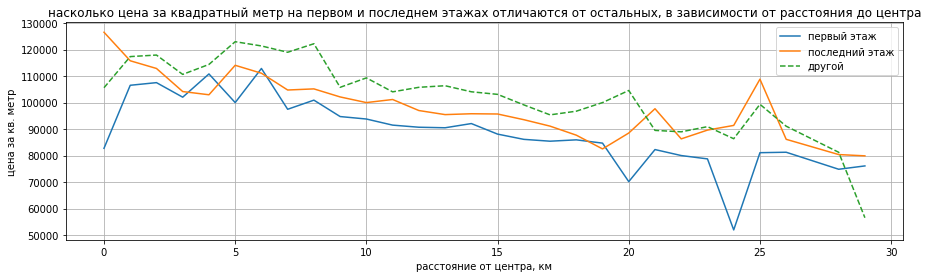

In [441]:
# график 
plt.figure(figsize=(15,4))
plt.plot(floor_price['km_to_center'], floor_price['first'], label='первый этаж')
plt.plot(floor_price['km_to_center'], floor_price['last'], label='последний этаж',)

plt.plot(floor_price['km_to_center'], floor_price['other'], label='другой', linestyle='dashed'  )
# plt.scatter(df['km_to_center'], df['square_meter_price'], alpha=0.002 )
plt.xlabel("расстояние от центра, км")
plt.ylabel("цена за кв. метр")
plt.title("насколько цена за квадратный метр на первом и последнем этажах отличаются от остальных, в зависимости от расстояния до центра")
# axes = plt.gca()
# axes.set_xlim([0, 10])
# axes.set_ylim([0, 250000])
plt.grid(True)
plt.legend()
plt.show()

В городской черте первый и последний этажи ценятся меньше, в пригородах этому правилу есть исключения: в каких то местах разница отсутствует, а вкаких то обратная зависимость. Причиной этому может быть как специфика (малоэтажность, другие предпочтения покупателей) так и малое количество данных по пригородам и высокое влияние выбросов значений.  

Честно говоря, правую часть графика нельзя считать содержательной, так как в ней собраны данные 15 непохожих друг на друга населенных пунктов от промышленных до курортных.

### Зависимость цены от количества комнат

Посчитаем сколько каких квартир в нашей выборке.

In [442]:
# сводная таблица 
rooms_percent = df_cuted.pivot_table(index='rooms', values='square_meter_price', aggfunc=['count', 'median']).reset_index()
rooms_percent.columns = ['rooms', 'rooms_count', 'median_sq_m_price']
rooms_percent['percent'] = (rooms_percent['rooms_count'] / len(df_cuted)).round(2)
rooms_percent

,rooms,rooms_count,median_sq_m_price,percent
0,0,192,105050.0,0.01
1,1,7835,100000.0,0.36
2,2,7576,91993.0,0.35
3,3,5229,86995.0,0.24
4,4,778,84699.0,0.04
5,5,73,80846.0,0.00
6,6,8,104330.5,0.00
7,7,1,134095.0,0.00


95 % преддставленных на рынке квартир - это одно двух и трех комнатные. Четырехкомнатные составляют дополнительно 4 %. Все остальное варианты плантровок 1 %.

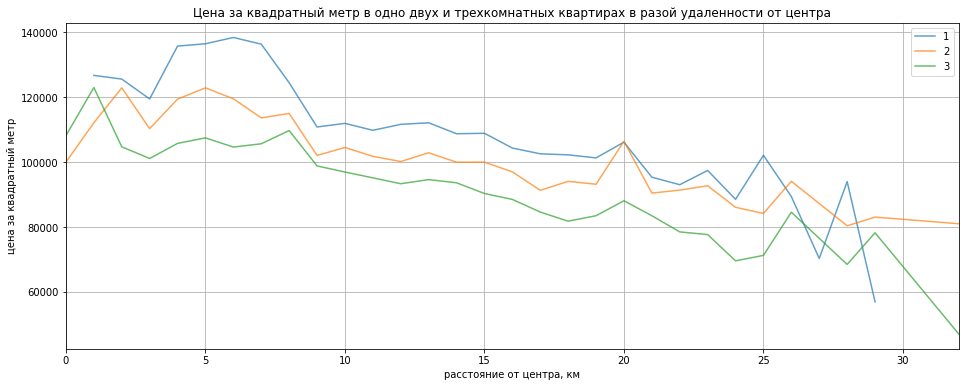

In [443]:
rooms_list = [1, 2, 3]
# rooms_list = df['rooms'].unique().tolist()
for i in rooms_list:
    df_cuted[(df_cuted['rooms'] == i) & (df_cuted['locality_name'] == 'Санкт-Петербург')].groupby('km_to_center')['square_meter_price'].median().plot(kind='line', alpha=0.7, figsize=(16,6), label=i )
    
plt.grid(True)
plt.legend()    
plt.title('Цена за квадратный метр в одно двух и трехкомнатных квартирах в разой удаленности от центра')
plt.xlabel("расстояние от центра, км")
plt.ylabel("цена за квадратный метр")
plt.show()

На рынке обычных квартир одно двух и трех комнатных наблюдается зависимость: чем меньше комнат тем дороже квадратный метр в квартире.

In [444]:
print(1 - rooms_percent.loc[3, 'median_sq_m_price'] / rooms_percent.loc[2, 'median_sq_m_price'])

print(1 - rooms_percent.loc[2, 'median_sq_m_price'] / rooms_percent.loc[1, 'median_sq_m_price'])

0.054330220777667915
0.08006999999999997


В среднем, квадратный метр в двухкомнатной квартире стоит на 7% дороже чем в однокомнатной. А в трехкомнатной на 4 % дороже чем в двухкомнатной.

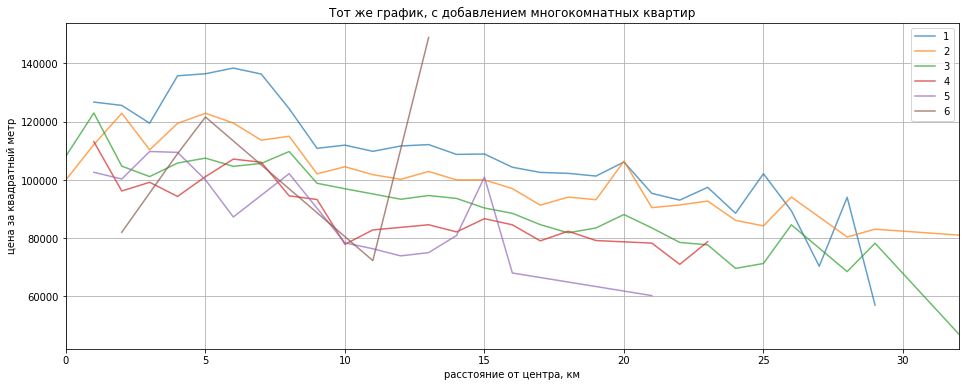

In [445]:
rooms_list = [1, 2, 3, 4, 5, 6]
# rooms_list = df['rooms'].unique().tolist()
for i in rooms_list:
    df_cuted[(df_cuted['rooms'] == i) & (df_cuted['locality_name'] == 'Санкт-Петербург')].groupby('km_to_center')['square_meter_price'].median().plot(kind='line', alpha=0.7, figsize=(16,6), label=i )
    
plt.grid(True)
plt.legend()    
plt.title('Тот же график, с добавлением многокомнатных квартир')
plt.xlabel("расстояние от центра, км")
plt.ylabel("цена за квадратный метр")
plt.show()

А вот многокомнатные квартиры частично представляют дорогой сегмент и ведут себя непредсказуемо.

Средняя цена за квадратный метр в многокомнтных квартирах 4 и более зависит от района и вероятно скрытых факторов таких как дом, его год постройки, уровень элитности жилого комплекса. 

### Зависимость от высоты потолков

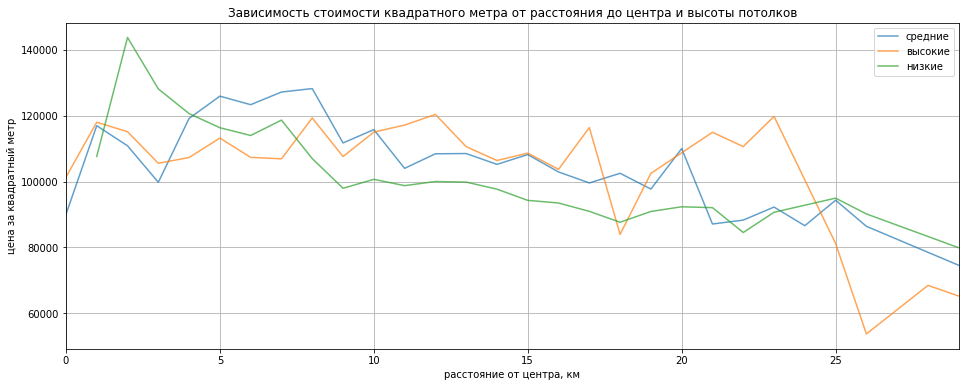

In [446]:
ceiling_list = ['средние', 'высокие', 'низкие']

for i in ceiling_list:
    df_cuted[(df_cuted['ceiling_height_cat'] == i) & (df_cuted['locality_name'] == 'Санкт-Петербург')].groupby('km_to_center')['square_meter_price'].median().plot(kind='line', alpha=0.7, figsize=(16,6), label=i )
    
plt.grid(True)
plt.legend()    
plt.title('Зависимость стоимости квадратного метра от расстояния до центра и высоты потолков')
plt.xlabel("расстояние от центра, км")
plt.ylabel("цена за квадратный метр")
plt.show()

Высокие потолки признак более качественного жилья. Но это не значит что, чем выше тем дороже.  
Высокие потолки как правило спутник более высокой стоимости квадратноого метра. Но цена так же зависит от места и от дома. 
Низкие 2,5 метровые потолки это признак дома советкой постройки, с маленькими квартирами, кухнями, холлами и потрепенные временем,  по этому стоимость квадратного метра в них дешевле.

In [447]:
# считаем на сколько дороже высокие потолки
df_cuted.pivot_table(index='ceiling_height_cat', values='square_meter_price', aggfunc='median')

,square_meter_price
ceiling_height_cat,
высокие,106060
"не указано, но вероятно низкие",91025
низкие,87145
средние,97777


Квадратный метр в квартирах с потолками выше 2,5 метров стоит дороже. 

Условный средний уровень (2,5-2,8 м) в среднемстоит дороже на 12%,
а высокий (2,8 м и выше) на 22% дороже низких.


### Центр города

Центр города условно ограничивается радиусом в 3 км, границей резкого повышения цен на квартиры. Посмотрим сколько из объявлений попало в этот круг.

In [448]:

print('Всего объявлений попавших в трехкилометровую границу центральной части:', len(df.query('cityCenters_nearest < 3000')))
print('То же после ликвидации выбросов:', len(df_cuted.query('cityCenters_nearest < 3000')))

Всего объявлений попавших в трехкилометровую границу центральной части: 635
То же после ликвидации выбросов: 379


#### Подгоотовка новой выборки для центра 

Выше мы избавились от редких и выбивающихся значений. Скорее всего, то что является выбросом для рынка вцелом, укладывается в норму для центра города.

Определим границы выбросов для столбцов  общей площади и стоимости квадратного метра.

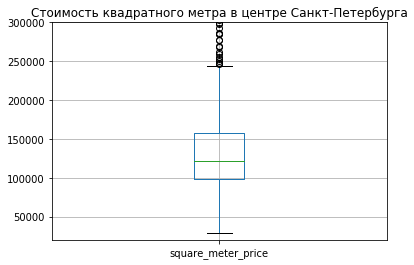

In [449]:
df.query('cityCenters_nearest < 3000').boxplot(column=['square_meter_price'])
plt.ylim(20000, 300000)
plt.title("Стоимость квадратного метра в центре Санкт-Петербурга")

plt.show()

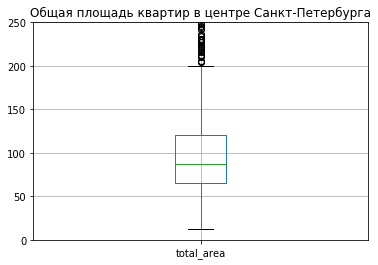

In [450]:

df.query('cityCenters_nearest < 3000').boxplot(column=['total_area'])
plt.ylim(0, 250)
plt.title("Общая площадь квартир в центре Санкт-Петербурга")
plt.show()

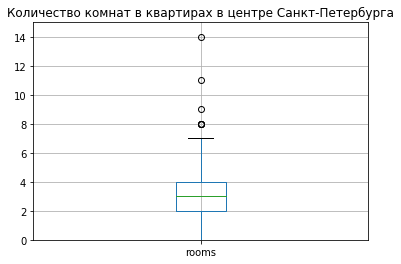

In [451]:
df.query('cityCenters_nearest < 3000').boxplot(column=['rooms'])
plt.ylim(0, 15)
plt.title("Количество комнат в квартирах в центре Санкт-Петербурга")
plt.show()

Отфильтруем в соответствии с новыми данными, и посмотрим сколько записей теперь попало в выборку.

In [452]:
# отфильтруем в отдельный датафрейм
df_center = df.query('cityCenters_nearest < 3000 and total_area < 250 and 20000 < square_meter_price < 250000 and rooms < 8')
len(df_center)

557

Без выбросов определенных для ценра, в центральной части, осталось 563 объявления.


In [453]:
# округлим расстояние до центра до сотен метров
df_center['m_to_center'] = ((df_center['cityCenters_nearest'] / 100).round(0))*100


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Построим график зависимости расстояния до центра и средней стоимости квадратного метра.

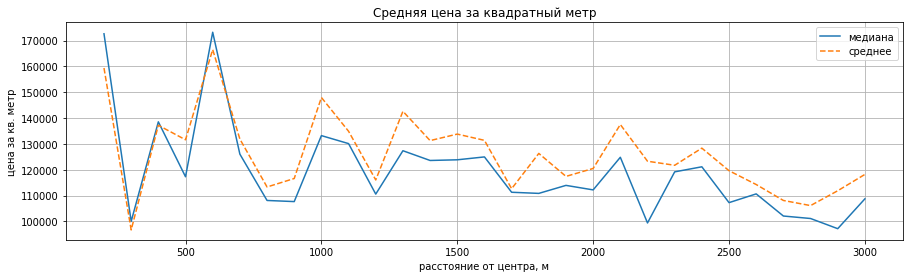

In [454]:

m_cost = df_center.pivot_table(index='m_to_center', values='square_meter_price', aggfunc=['count', 'mean', 'median']).reset_index()
m_cost.columns = ['m_to_center', 'count', 'mean', 'median']

# график 
plt.figure(figsize=(15,4))
plt.plot(m_cost['m_to_center'], m_cost['median'], label='медиана')
plt.plot(m_cost['m_to_center'], m_cost['mean'], label='среднее', linestyle='dashed'  )

plt.xlabel("расстояние от центра, м")
plt.ylabel("цена за кв. метр")
plt.title("Средняя цена за квадратный метр")

plt.grid(True)
plt.legend()
plt.show()

Цена за квадратный метр по мере приближения к центру значительно повышается, но предложений становится меньше по этому на графике большие скачки.

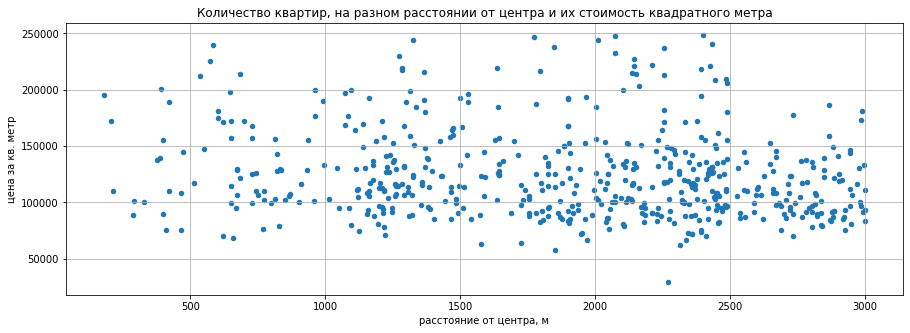

In [455]:
df_center.plot(x='cityCenters_nearest', y='square_meter_price', kind='scatter', figsize=(15, 5), grid=True, alpha=1)
plt.xlabel("расстояние от центра, м")
plt.ylabel("цена за кв. метр")
plt.title("Количество квартир, на разном расстоянии от центра и их стоимость квадратного метра")
plt.show()

#### Сравнение средних значений центра и всего города

Сравним средние значения характерные для центра и для города целиком.

In [456]:
# составим список основных характеристик
main_properties = ['last_price', 'total_area', 'rooms', 'square_meter_price', 'ceiling_height', 'living_area', 'kitchen_area', 'balcony', 'days_exposition', 'living_area_factor', 'kitchen_area_factor']
# создадим датафрейм
df_mean = pd.DataFrame(columns = main_properties)
# заполним его медианами
df_mean.loc['center'] = df_center[main_properties].median()
df_mean.loc['all_spb'] = df_cuted.query('floor_level == "последний" and locality_name == "Санкт-Петербург"')[main_properties].median()
df_mean

,last_price,total_area,rooms,square_meter_price,ceiling_height,living_area,kitchen_area,balcony,days_exposition,living_area_factor,kitchen_area_factor
center,9500000.0,83.4,3.0,116054.0,3.125,50.0,11.5,0.0,143.0,0.622222,0.139241
all_spb,5100000.0,53.2,2.0,99206.0,2.650,31.6,8.3,1.0,97.0,0.600000,0.154717


Квартиры в центре в среднем в два раза больше по площади и на 17% дороже. При том что по ряду показателей (высота потолка, площадь кухни, расположение разумеется) квартиры в центре лучше, продаются они в полтора раза дольше, значит спрос на них ниже. 

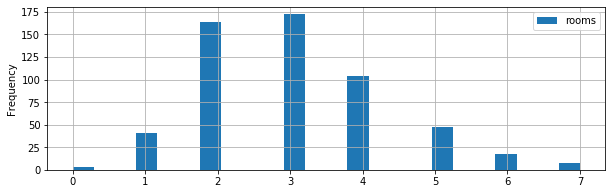

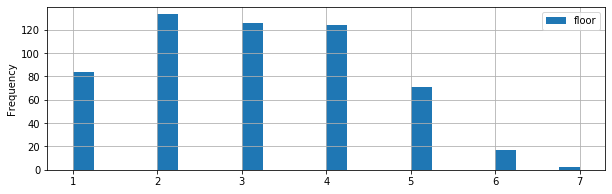

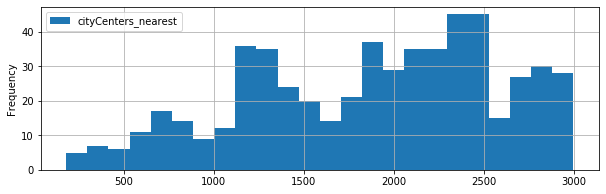

In [457]:
hist_list = ['rooms', 'floor', 'cityCenters_nearest']
for i in hist_list:
    df_center[i].plot(kind='hist', bins=24, grid=True, legend=True, figsize=(10, 3))
    plt.show()

#### Зависимость цены от количества комнат

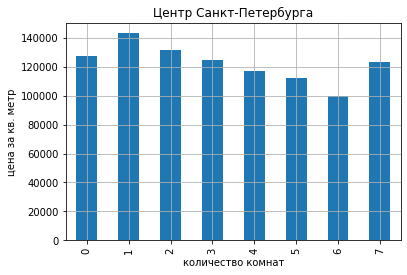

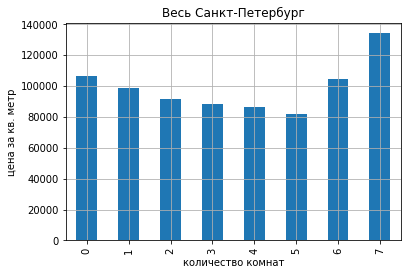

In [458]:
df_center.groupby('rooms')['square_meter_price'].mean().plot(kind="bar", grid=True)
plt.xlabel("количество комнат")
plt.ylabel("цена за кв. метр")
plt.title("Центр Санкт-Петербурга")
plt.show()

df_cuted.groupby('rooms')['square_meter_price'].mean().plot(kind="bar", grid=True)
plt.xlabel("количество комнат")
plt.ylabel("цена за кв. метр")
plt.title("Весь Санкт-Петербург")
plt.show()

И во всем городе и в центре существует зависимоть чем больше комнат и чем больше площадь тем дешевле стоимость квадратного метра, но 

#### Зависимость цены от площади

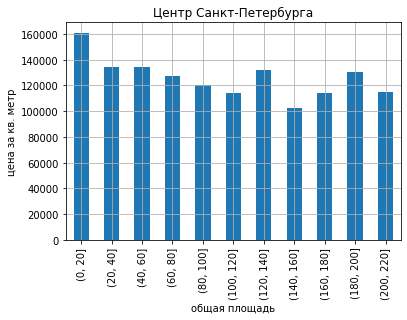

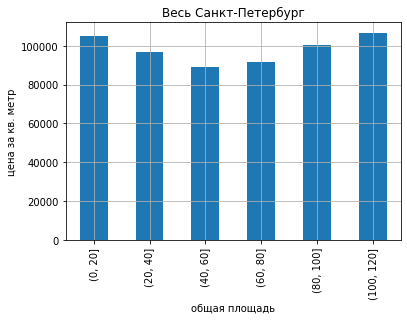

In [459]:
df_center.groupby(pd.cut(df_center['total_area'], [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]))['square_meter_price'].mean().plot(kind="bar", grid=True)
plt.xlabel("общая площадь")
plt.ylabel("цена за кв. метр")
plt.title("Центр Санкт-Петербурга")
plt.show()

df_cuted.groupby(
    pd.cut(
        df_cuted['total_area'], [0, 20, 40, 60, 80, 100, 120]
    )
)['square_meter_price'].mean().plot(kind="bar", grid=True)

plt.xlabel("общая площадь")
plt.ylabel("цена за кв. метр")
plt.title("Весь Санкт-Петербург")
plt.show()

Аналогичная ситуация - при увеличении площади после определенного значения квартира переходит в более дорогой класс, где общая закономерность не рабоотает.
Для центра города этот перелом наступает на 140 кв.м. (Пик именно в этом месте скорее всего аномалия проявившаяся из-за малого размера выборки.)

Выходит, что для города в целом квартиры более 70 кв. м считаются уже более престижными, чем основая масса предложений на рынке.

## <a id="step_5"> Шаг 5. Общий вывод </a>


Главные параметры влияющие на стоимость квартиры - это расположение (населенный пункт) и расстояние до центра Санкт-Петербурга. Цена в первую очередь зависит от того, где находится квартира. Разница даже между районами города, обозначенными как отдельные населенные пункты достигает 30%.

После расположения на цену наиболее значительноое влияние оказывает высота потолков. Чем выше тем дороже.
Но не только потому, что люди любят пространство над головой и готовы на него платить больше. Потолки выше советского стандарта 2,5 м  - атрибут либо более современного жилья (сегодня у застройщиков стандарт 2,7 м), либо жилья в старом фонде в центре, либо квартир премиального уровня (премиум не проектируют ниже 3 м).
Квадратный метр в квартирах с потолками выше 2,5 метров стоит дороже чем в квартирах с потолками 2,5 метра и ниже. 

Условный средний уровень (2,5-2,8 м) в примерно стоит дороже на 12% низкого (2,5м),
а высокий (2,8 м и выше) на 22% дороже низких.

Этаж квартиры. В среднем, на первых этажах стоимость квадратного метра дешевле на 10% На последних дешевле, но не значительно, на 3%.

В среднем, квадратный метр в двухкомнатной квартире стоит на 7% дороже чем в однокомнатной. А в трехкомнатной на 4 % дороже чем в двухкомнатной. С количества комнат больше четырех цена за квадратный метр перестает падать и начинает расти.

Аналогично, есть зависимость цены от общей площади квартиры. До определенного предела увеличение площади вызывает уменьшение цены квадратного метра. Этот предел переход жилья в более дорогой класс, где на цену могут влиять дополнительные свойства жилья (например охрана или просторные лестничные холлы). 

Наличие балкона или нескольких делает квартиру более привлекательной и в городской черте вызывает повышение цены в среднем на 8% и на 6% в области.

Расстояние до парка или пруда влияет только в случае непосредственной близости. Больше ценится вид на парк (речку), чем возможность прогуливаться по нему.

-------

Возможно в объявления о продаже следует добавить новые поля, к примеру: наличие ремонта,  тип дома, год постройки и дополнительные опции общественных зон жилого комплекса. Наличие этих данных позволит системе точнее определять стоимость.